Loaded 6745 rows from C:\Users\kumar\Downloads\Uber Request Data.csv
First 5 rows of the dataset:
   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47  
Number of rows: 6745
Number of columns: 6
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id   

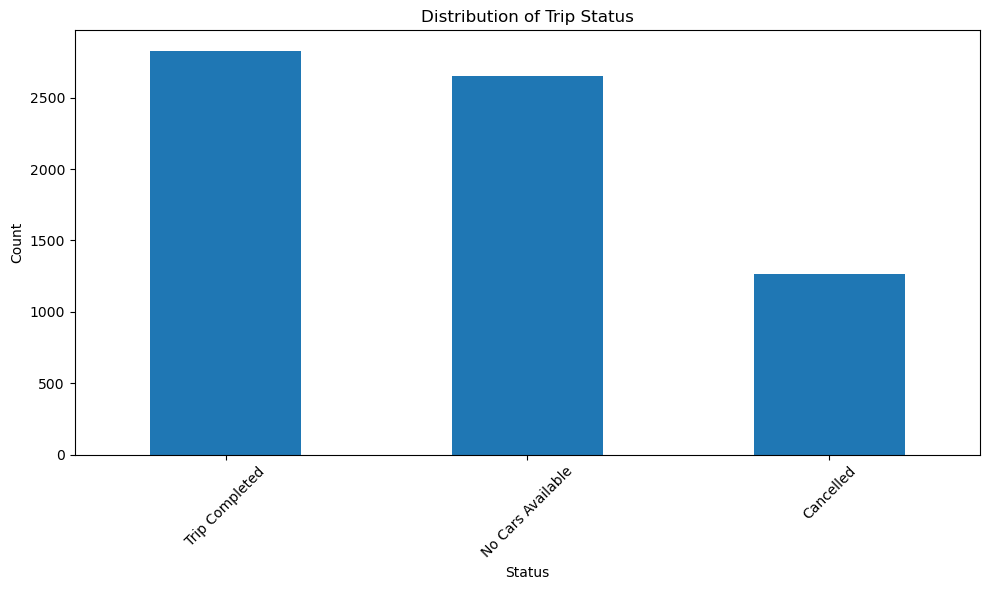

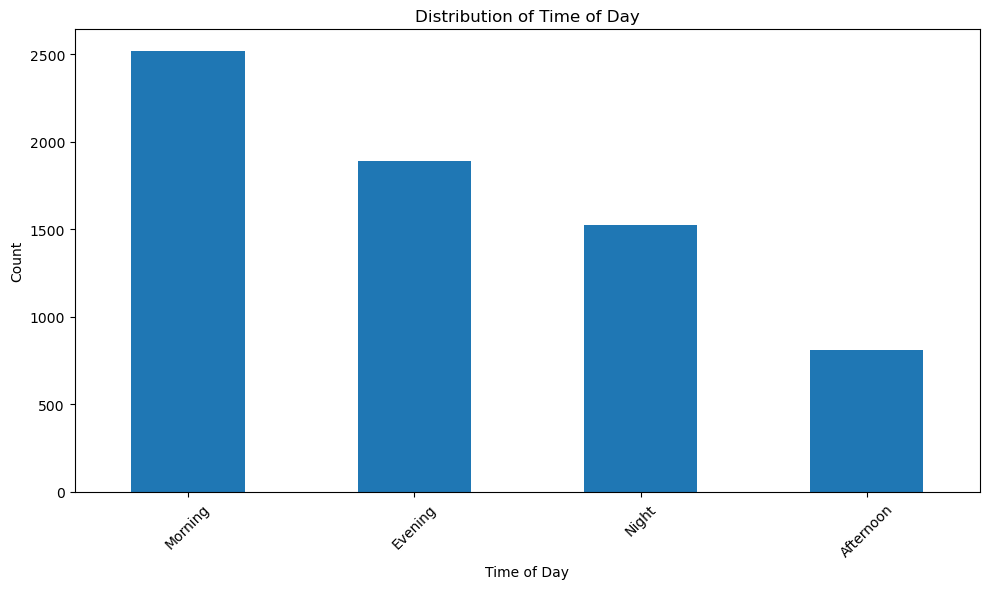

<Figure size 1000x600 with 0 Axes>

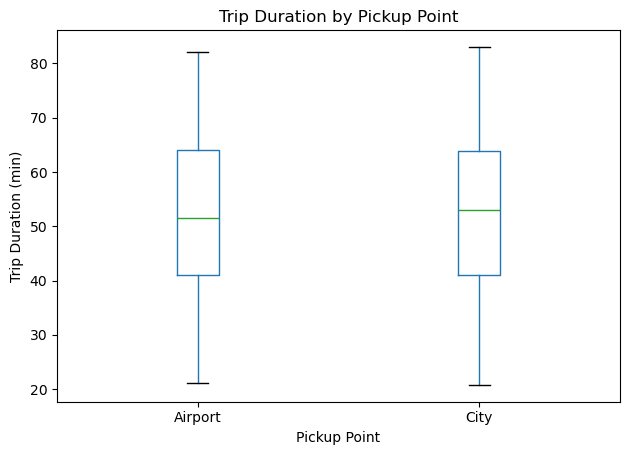

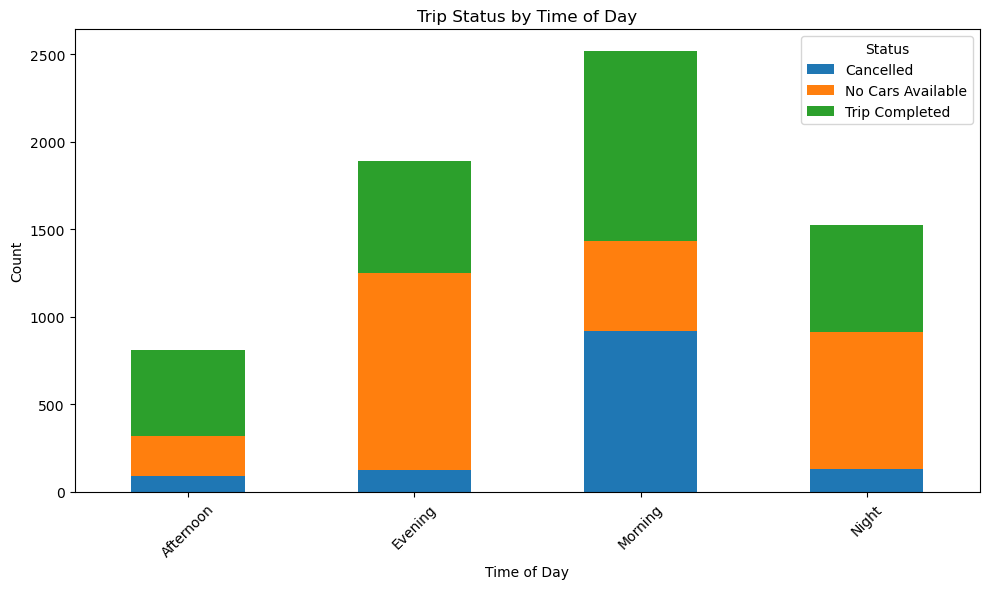

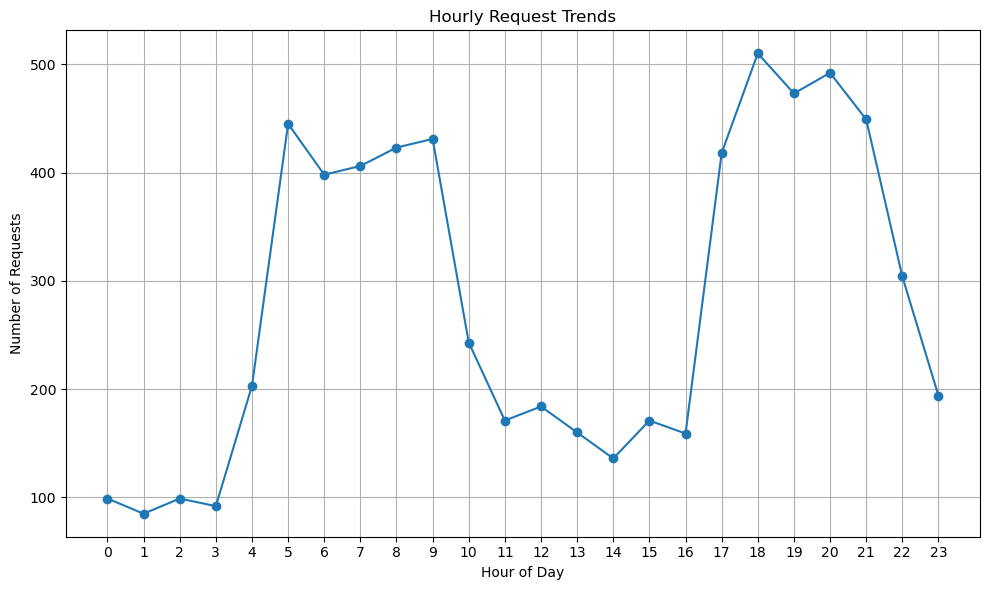

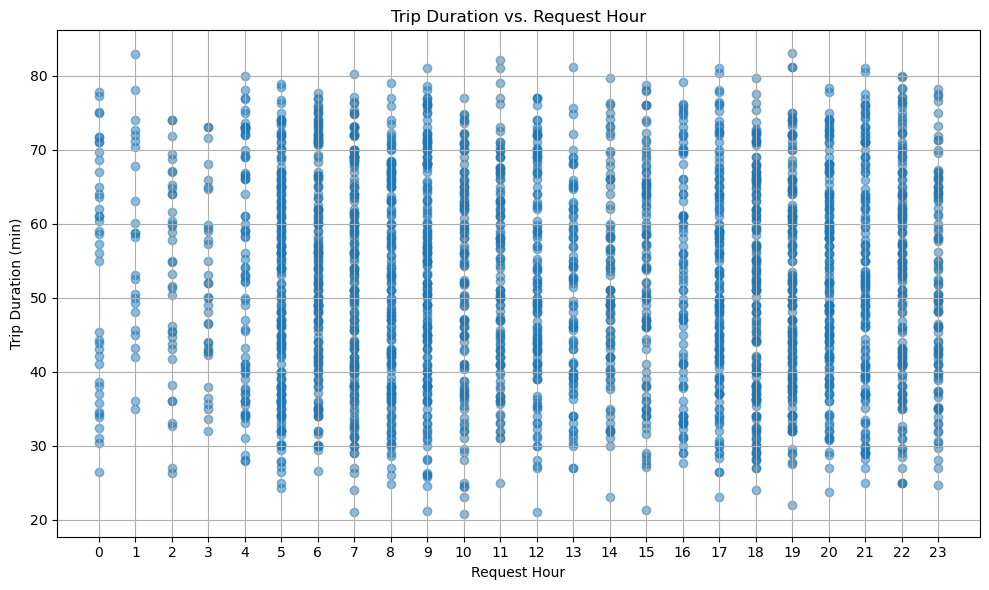

Unique Values for each variable:
Request id: [ 619  867 1807 2532 3112 3879 4270 5510 6248  267]... (Total unique: 6745)
Pickup point: ['Airport', 'City']
Categories (2, object): ['Airport', 'City']... (Total unique: 2)
Driver id: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]... (Total unique: 301)
Status: ['Trip Completed', 'Cancelled', 'No Cars Available']
Categories (3, object): ['Cancelled', 'No Cars Available', 'Trip Completed']... (Total unique: 3)
Request timestamp: <DatetimeArray>
['2016-07-11 11:51:00', '2016-07-11 17:57:00', '2016-07-12 09:17:00',
 '2016-07-12 21:08:00', '2016-07-13 08:33:16', '2016-07-13 21:57:28',
 '2016-07-14 06:15:32', '2016-07-15 05:11:52', '2016-07-15 17:57:27',
 '2016-07-11 06:46:00']
Length: 10, dtype: datetime64[ns]... (Total unique: 5618)
Drop timestamp: <DatetimeArray>
['2016-07-11 13:00:00', '2016-07-11 18:47:00', '2016-07-12 09:58:00',
 '2016-07-12 22:03:00', '2016-07-13 09:25:47', '2016-07-13 22:28:59',
 '2016-07-14 07:13:15', '2016-07-15 06:07:52',

In [17]:


# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import mysql.connector
from mysql.connector import Error

# Dataset Loading
# Load Dataset
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Loaded {len(df)} rows from {file_path}")
        return df
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

# Dataset First View
# Dataset First Look
def dataset_first_look(df):
    if df is not None and not df.empty:
        print("First 5 rows of the dataset:")
        print(df.head())
    else:
        print("No data to display")

# Dataset Rows & Columns count
# Dataset Rows & Columns count
def dataset_rows_columns_count(df):
    if df is not None and not df.empty:
        print(f"Number of rows: {df.shape[0]}")
        print(f"Number of columns: {df.shape[1]}")
    else:
        print("No data to analyze")

# Dataset Information
# Dataset Info
def dataset_info(df):
    if df is not None and not df.empty:
        print("Dataset Information:")
        print(df.info())
    else:
        print("No data to display")

# Duplicate Values
# Dataset Duplicate Value Count
def dataset_duplicate_value_count(df):
    if df is not None and not df.empty:
        duplicate_count = df.duplicated().sum()
        print(f"Number of duplicate rows: {duplicate_count}")
    else:
        print("No data to analyze")

# Missing Values/Null Values
# Missing Values/Null Values Count
def missing_values_count(df):
    if df is not None and not df.empty:
        print("Missing Values Count per Column:")
        print(df.isnull().sum())
    else:
        print("No data to analyze")

# Visualizing the missing values
def visualize_missing_values(df):
    if df is not None and not df.empty:
        print("Visualizing missing values (summary):")
        missing_summary = df.isnull().sum()
        print(missing_summary[missing_summary > 0])
    else:
        print("No data to visualize")

# Visualization
# Visualize Data
def visualize_data(df):
    if df is not None and not df.empty:
        # 1. Distribution of Status
        plt.figure(figsize=(10, 6))
        df['Status'].value_counts().plot(kind='bar')
        plt.title('Distribution of Trip Status')
        plt.xlabel('Status')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 2. Distribution of Time of Day
        plt.figure(figsize=(10, 6))
        df['Time of Day'].value_counts().plot(kind='bar')
        plt.title('Distribution of Time of Day')
        plt.xlabel('Time of Day')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 3. Trip Duration by Pickup Point (Box Plot)
        plt.figure(figsize=(10, 6))
        df.boxplot(column='Trip Duration (min)', by='Pickup point', grid=False)
        plt.title('Trip Duration by Pickup Point')
        plt.suptitle('')  # Remove default title
        plt.xlabel('Pickup Point')
        plt.ylabel('Trip Duration (min)')
        plt.tight_layout()
        plt.show()

        # 4. Status by Time of Day (Stacked Bar Chart)
        status_time = pd.crosstab(df['Time of Day'], df['Status'])
        status_time.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title('Trip Status by Time of Day')
        plt.xlabel('Time of Day')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Status')
        plt.tight_layout()
        plt.show()

        # 5. Hourly Request Trends (Line Chart)
        hourly_requests = df.groupby('Request Hour')['Request id'].count()
        plt.figure(figsize=(10, 6))
        hourly_requests.plot(kind='line', marker='o')
        plt.title('Hourly Request Trends')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Requests')
        plt.xticks(range(0, 24))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # 6. Scatter Plot: Trip Duration vs. Request Hour
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Request Hour'], df['Trip Duration (min)'], alpha=0.5)
        plt.title('Trip Duration vs. Request Hour')
        plt.xlabel('Request Hour')
        plt.ylabel('Trip Duration (min)')
        plt.xticks(range(0, 24))
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No data to visualize")

# Unique Values
# Check Unique Values for each variable
def check_unique_values(df):
    if df is not None and not df.empty:
        print("Unique Values for each variable:")
        for column in df.columns:
            unique_values = df[column].unique()
            print(f"{column}: {unique_values[:10]}... (Total unique: {len(unique_values)})")  # Limit to 10 for brevity
    else:
        print("No data to analyze")

# Additional Functions for Data Wrangling
def parse_timestamp(timestamp):
    if pd.isna(timestamp) or timestamp == 'NA':
        return None
    formats = ['%d/%m/%Y %H:%M', '%d-%m-%Y %H:%M:%S', '%d/%m/%Y %H:%M:%S']  # Added third format for consistency
    for fmt in formats:
        try:
            return pd.to_datetime(timestamp, format=fmt, dayfirst=True)
        except ValueError:
            continue
    print(f"Warning: Could not parse timestamp {timestamp} with available formats")
    return pd.to_datetime(timestamp, errors='coerce', dayfirst=True)  # Fallback

def get_time_of_day(hour):
    if hour is None or pd.isna(hour):
        return 'Unknown'  
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

def clean_data(df):
    if df is None or df.empty:
        print("Input DataFrame is empty or None")
        return df
    
    print(f"Starting cleaning with {len(df)} rows")
 
    df['Request timestamp'] = df['Request timestamp'].apply(parse_timestamp)
    print(f"After parsing Request timestamp: {len(df)} rows")
    
    df['Drop timestamp'] = df['Drop timestamp'].apply(parse_timestamp)

    unparsed_requests = df[df['Request timestamp'].isna()]
    if not unparsed_requests.empty:
        print(f"Warning: {len(unparsed_requests)} rows have unparsed Request timestamps")
        print(unparsed_requests[['Request timestamp']].head())

    df['Trip Duration (min)'] = df.apply(
        lambda row: min(max((row['Drop timestamp'] - row['Request timestamp']).total_seconds() / 60, 0), 120) 
        if row['Status'] == 'Trip Completed' and pd.notnull(row['Drop timestamp']) else None, 
        axis=1
    )

    df['Driver id'] = df['Driver id'].replace('NA', np.nan)
    
    df['Request Date'] = df['Request timestamp'].apply(lambda x: x.date() if pd.notnull(x) else None)
    df['Request Hour'] = df['Request timestamp'].apply(lambda x: x.hour if pd.notnull(x) else None)
    
    # Categorizing time of day
    df['Time of Day'] = df['Request Hour'].apply(get_time_of_day)
    
    # Ensuring categorical columns
    df['Pickup point'] = df['Pickup point'].astype('category')
    df['Status'] = df['Status'].astype('category')
  
    df = df.dropna(subset=['Request timestamp'])
    print(f"After dropping invalid timestamps: {len(df)} rows")
    
    return df

def save_cleaned_data(df, output_path):
    try:
        if df is not None and not df.empty:
            df.to_csv(output_path, index=False)
            print(f"Successfully saved {len(df)} rows to {output_path}")
        else:
            print(f"No data to save to {output_path}")
    except Exception as e:
        print(f"Error saving file: {e}")

# New Function: Create and Populate MySQL Database
def create_and_populate_mysql_database(df, host, user, password, database):
    conn = None
    try:
        # Establish connection to MySQL with explicit authentication plugin
        conn = mysql.connector.connect(
            host=host,
            user=user,
            password=password,
            database=database,
            auth_plugin='mysql_native_password'
        )
        if conn.is_connected():
            print(f"Connected to MySQL database: {database}")
            cursor = conn.cursor()

            # Create table (if not already created in Workbench)
            cursor.execute('''
                CREATE TABLE IF NOT EXISTS uber_requests (
                    request_id INT PRIMARY KEY,
                    pickup_point VARCHAR(20),
                    driver_id INT,
                    status VARCHAR(50),
                    request_timestamp DATETIME,
                    drop_timestamp DATETIME,
                    trip_duration_min DECIMAL(10, 2),
                    request_date DATE,
                    request_hour INT,
                    time_of_day VARCHAR(20)
                )
            ''')

            # Convert datetime columns to string format compatible with MySQL
            df['request_timestamp'] = df['Request timestamp'].apply(
                lambda x: x.strftime('%Y-%m-%d %H:%M:%S') if pd.notnull(x) else None
            )
            df['drop_timestamp'] = df['Drop timestamp'].apply(
                lambda x: x.strftime('%Y-%m-%d %H:%M:%S') if pd.notnull(x) else None
            )
            df['request_date'] = df['Request Date'].apply(
                lambda x: x.strftime('%Y-%m-%d') if pd.notnull(x) else None
            )

            # Replace NaN with None for all columns to be inserted
            for column in ['Request id', 'Pickup point', 'Driver id', 'Status', 
                          'request_timestamp', 'drop_timestamp', 'Trip Duration (min)', 
                          'request_date', 'Request Hour', 'Time of Day']:
                df[column] = df[column].where(pd.notnull(df[column]), None)

            # Debug: Check data before insertion
            print(f"Sample data to insert: {df[['Request id', 'Pickup point', 'Request timestamp']].head().to_dict()}")
            data = [tuple(row) for row in df[['Request id', 'Pickup point', 'Driver id', 'Status', 
                                             'request_timestamp', 'drop_timestamp', 'Trip Duration (min)', 
                                             'request_date', 'Request Hour', 'Time of Day']].to_numpy()]
            print(f"Number of rows to insert: {len(data)}")

            # Insert data into table
            cursor.executemany('''
                INSERT INTO uber_requests (request_id, pickup_point, driver_id, status, request_timestamp, 
                                          drop_timestamp, trip_duration_min, request_date, request_hour, time_of_day)
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                ON DUPLICATE KEY UPDATE request_id = VALUES(request_id)
            ''', data)
            conn.commit()
            print(f"Successfully populated {len(data)} rows into {database}.uber_requests")
        else:
            print("Failed to connect to the MySQL database.")

    except Error as e:
        print(f"Error creating or populating MySQL database: {e}")
    finally:
        if conn is not None and conn.is_connected():
            cursor.close()
            conn.close()
            print("MySQL connection closed.")
# Main execution
if __name__ == "__main__":
    # Your file path
    input_file = r"C:\Users\kumar\Downloads\Uber Request Data.csv"
    output_file = r"C:\Users\kumar\Downloads\Cleaned_Uber_Request_Data.csv"
    
    # MySQL connection details (replace with your credentials)
    mysql_host = "localhost"  # Default host for local MySQL server
    mysql_user = "root"       # Default MySQL user (change if different)
    mysql_password = "Amit@1977"  # Replace with your MySQL root password
    mysql_database = "uber_db"  # Database name created in MySQL Workbench

    # Loading and cleaning data
    data = load_data(input_file)
    dataset_first_look(data)
    dataset_rows_columns_count(data)
    dataset_info(data)
    dataset_duplicate_value_count(data)
    missing_values_count(data)
    visualize_missing_values(data)
    cleaned_data = clean_data(data)
    visualize_data(cleaned_data)
    check_unique_values(cleaned_data)
    save_cleaned_data(cleaned_data, output_file)
    create_and_populate_mysql_database(cleaned_data, mysql_host, mysql_user, mysql_password, mysql_database)
